In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

**STEP 1**: open exploration

2000 randomly generated scenarios with no policy with aggregated results over the complete region (problem_formulation_id == 0)

In [45]:
# Reading the results file
from ema_workbench import load_results
file_name = 'nopolicy.tar.gz'
results_np_overall = load_results(file_name)
# Extracting experiment and outcomes from results
experiments_np_overall, outcomes_np_overall = results_np_overall

In [46]:
df_outcomes_np_overall = pd.DataFrame.from_dict(outcomes_np_overall)

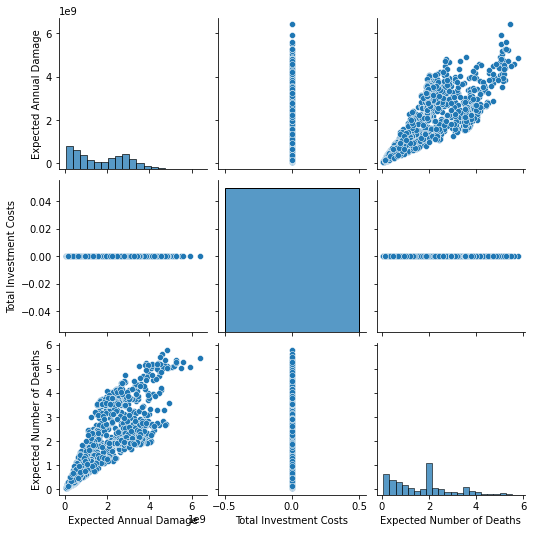

In [47]:
sns.pairplot(df_outcomes_np_overall)
plt.show()

In [48]:
from ema_workbench.analysis import prim

data = df_outcomes_np_overall["Expected Number of Deaths"]

y_np_overall = data > np.percentile(data, 80)

prim_alg = prim.Prim(experiments,y_np_overall, threshold=0.8, peel_alpha=0.05)
box1 = prim_alg.find_box()

In [49]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

In [50]:
box1.inspect(37)
box1.inspect(37, style='graph')
plt.show()

coverage        0.67
density     0.920962
id                37
mass          0.1455
mean        0.920962
res_dim            2
Name: 37, dtype: object

             box 37                                           
                min       max                        qp values
A.3_pfail  0.000336  0.153896  [-1.0, 1.2800506262715519e-159]
A.2_pfail  0.048267  0.999586       [0.2199734296989459, -1.0]



In [52]:
box1.select(37)
fig = box1.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

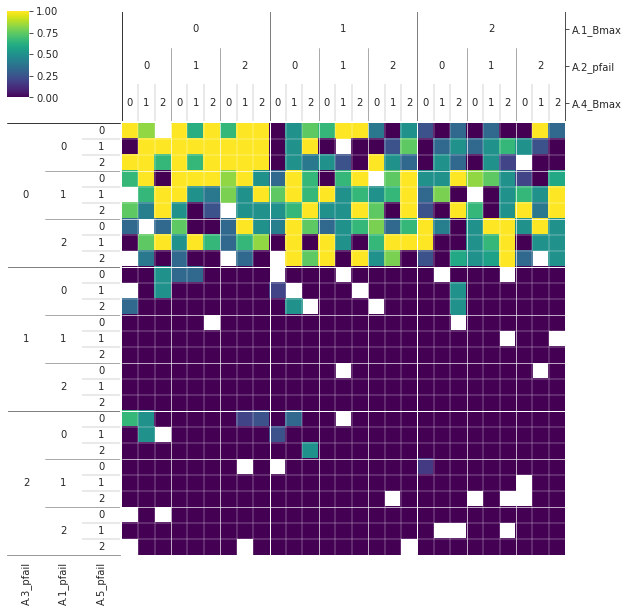

In [53]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(experiments, y_np_overall)
plt.show()

From the aggregated analysis it gets clear that the most casualties occur with a high probability of faillure of dike ring 3. This is in the Area of Zutphen and apparently this is the most vulnerable area. This will be analysed more in detail in the analysis aggregated over location. A strong dike in A1 and A2 also leads to more deaths, since this results in more water in Zutphen.

**Open exploration aggregated over the locations:**

In this section we analyse how the system functions in the different regions when there is no policy. Since we represent the province of Gelderland, a more in detail analysis of dike ring A1, A2 and A3 is analysed. 


4000 scenarios with no policy:

In [54]:
# Reading the results file
from ema_workbench import load_results
file_name = 'nopolicy_locations.tar.gz'
results_np_loc = load_results(file_name)
# Extracting experiment and outcomes from results
experiments_np_loc, outcomes_np_loc = results_np_loc

In [55]:
experiments_np_loc

A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                       107.0  136.113287      10.0   0.891347  298.222159   
1                        70.0  210.992827       1.5   0.919565  206.378068   
2                        44.0  194.259643      10.0   0.056464   66.558422   
3                        60.0  180.791233       1.5   0.496713  234.442547   
4                        65.0  252.814495      10.0   0.339488  213.594077   
...                       ...         ...       ...        ...         ...   
3995                     19.0  206.620975       1.5   0.061329  262.181051   
3996                      1.0   70.597689       1.0   0.976886  176.227107   
3997                    129.0  103.531332       1.0   0.972579   38.843144   
3998                     59.0  106.199639      10.0   0.153566  219.536996   
3999                    102.0  202.274426      10.0   0.555299  157.800745   

     A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  \
0          1.0   0.997847  264.721731       1.0   0.413864  ...   
1          1.5   0.373642  261.315345       1.0   0.499136  ...   
2         10.0   0.954512  209.698352       1.0   0.944407  ...   
3          1.0   0.807202   75.860085      10.0   0.437180  ...   
4         10.0   0.877404  260.716609       1.0   0.523509  ...   
...        ...        ...         ...       ...        ...  ...   
3995       1.5   0.863217  311.398642       1.5   0.682734  ...   
3996       1.0   0.457602  342.996504      10.0   0.706397  ...   
3997       1.0   0.713676  132.513108      10.0   0.896109  ...   
3998       1.5   0.623038  243.260135      10.0   0.090566  ...   
3999       1.0   0.033214  248.237001       1.0   0.289559  ...   

      A.3_DikeIncrease 2 A.4_DikeIncrease 0  A.4_DikeIncrease 1  \
0                    0.0                0.0                 0.0   
1                    0.0                0.0                 0.0   
2                    0.0                0.0                 0.0   
3                    0.0                0.0                 0.0   
4                    0.0                0.0                 0.0   
...                  ...                ...                 ...   
3995                 0.0                0.0                 0.0   
3996                 0.0                0.0                 0.0   
3997                 0.0                0.0                 0.0   
3998                 0.0                0.0                 0.0   
3999                 0.0                0.0                 0.0   

      A.4_DikeIncrease 2 A.5_DikeIncrease 0  A.5_DikeIncrease 1  \
0                    0.0                0.0                 0.0   
1                    0.0                0.0                 0.0   
2                    0.0                0.0                 0.0   
3                    0.0                0.0                 0.0   
4                    0.0                0.0                 0.0   
...                  ...                ...                 ...   
3995                 0.0                0.0                 0.0   
3996                 0.0                0.0                 0.0   
3997                 0.0                0.0                 0.0   
3998                 0.0                0.0                 0.0   
3999                 0.0                0.0                 0.0   

     A.5_DikeIncrease 2 scenario    policy     model  
0                   0.0     4004  Policy 0  dikesnet  
1                   0.0     4005  Policy 0  dikesnet  
2                   0.0     4006  Policy 0  dikesnet  
3                   0.0     4007  Policy 0  dikesnet  
4                   0.0     4008  Policy 0  dikesnet  
...                 ...      ...       ...       ...  
3995                0.0     7999  Policy 0  dikesnet  
3996                0.0     8000  Policy 0  dikesnet  
3997                0.0     8001  Policy 0  dikesnet  
3998                0.0     8002  Policy 0  dikesnet  
3999                0.0     8003  Policy 0  dikes

In [56]:
df_outcomes_np_loc = pd.DataFrame.from_dict(outcomes_np_loc)

In [57]:
df_outcomes_np_loc

A.1 Total Costs  A.1_Expected Annual Damage  \
0        0.000000e+00                0.000000e+00   
1        0.000000e+00                0.000000e+00   
2        2.808874e+09                2.808874e+09   
3        2.470547e+08                2.470547e+08   
4        2.784809e+09                2.784809e+09   
...               ...                         ...   
3995     3.688589e+09                3.688589e+09   
3996     0.000000e+00                0.000000e+00   
3997     0.000000e+00                0.000000e+00   
3998     2.736720e+09                2.736720e+09   
3999     1.514343e+08                1.514343e+08   

      A.1_Expected Number of Deaths  RfR Total Costs  \
0                          0.000000              0.0   
1                          0.000000              0.0   
2                          1.950129              0.0   
3                          0.194855              0.0   
4                          1.723963              0.0   
...                             ...              ...   
3995                       1.959069              0.0   
3996                       0.000000              0.0   
3997                       0.000000              0.0   
3998                       1.971488              0.0   
3999                       0.113456              0.0   

      Expected Evacuation Costs  A.2 Total Costs  A.2_Expected Annual Damage  \
0                           0.0     7.278693e+05                7.278693e+05   
1                           0.0     1.029448e+08                1.029448e+08   
2                           0.0     0.000000e+00                0.000000e+00   
3                           0.0     0.000000e+00                0.000000e+00   
4                           0.0     0.000000e+00                0.000000e+00   
...                         ...              ...                         ...   
3995                        0.0     0.000000e+00                0.000000e+00   
3996                        0.0     7.783738e+07                7.783738e+07   
3997                        0.0     2.632888e+07                2.632888e+07   
3998                        0.0     0.000000e+00                0.000000e+00   
3999                        0.0     9.607626e+08                9.607626e+08   

      A.2_Expected Number of Deaths  A.3 Total Costs  \
0                          0.000688     3.426359e+08   
1                          0.121829     4.032881e+07   
2                          0.000000     0.000000e+00   
3                          0.000000     2.861322e+08   
4                          0.000000     0.000000e+00   
...                             ...              ...   
3995                       0.000000     0.000000e+00   
3996                       0.080050     1.008550e+07   
3997                       0.021882     2.220765e+07   
3998                       0.000000     1.141397e+09   
3999                       0.861101     9.095372e+06   

      A.3_Expected Annual Damage  A.3_Expected Number of Deaths  \
0                   3.426359e+08                       0.571724   
1                   4.032881e+07                       0.090066   
2                   0.000000e+00                       0.000000   
3                   2.861322e+08                       0.566592   
4                   0.000000e+00                       0.000000   
...                          ...                            ...   
3995                0.000000e+00                       0.000000   
3996                1.008550e+07                       0.020052   
3997                2.220765e+07                       0.034953   
3998                1.141397e+09                       2.057743   
3999                9.095372e+06                       0.016372   

      A.4 Total Costs  A.4_Expected Annual Damage  \
0        0.000000e+00                0.000000e+00   
1        3.597040e+07                3.597040e+07   
2        0.000000e+00                0.000000e+00   
3        0.000000e+00                0.000000

In [58]:
cleaned_outcomes_np_loc = df_outcomes_np_loc.drop(df_outcomes_np_loc.columns[[0,3,4,5,8,11,14]], axis = 1)

In [59]:
cleaned_outcomes_np_loc

A.1_Expected Annual Damage  A.1_Expected Number of Deaths  \
0                   0.000000e+00                       0.000000   
1                   0.000000e+00                       0.000000   
2                   2.808874e+09                       1.950129   
3                   2.470547e+08                       0.194855   
4                   2.784809e+09                       1.723963   
...                          ...                            ...   
3995                3.688589e+09                       1.959069   
3996                0.000000e+00                       0.000000   
3997                0.000000e+00                       0.000000   
3998                2.736720e+09                       1.971488   
3999                1.514343e+08                       0.113456   

      A.2_Expected Annual Damage  A.2_Expected Number of Deaths  \
0                   7.278693e+05                       0.000688   
1                   1.029448e+08                       0.121829   
2                   0.000000e+00                       0.000000   
3                   0.000000e+00                       0.000000   
4                   0.000000e+00                       0.000000   
...                          ...                            ...   
3995                0.000000e+00                       0.000000   
3996                7.783738e+07                       0.080050   
3997                2.632888e+07                       0.021882   
3998                0.000000e+00                       0.000000   
3999                9.607626e+08                       0.861101   

      A.3_Expected Annual Damage  A.3_Expected Number of Deaths  \
0                   3.426359e+08                       0.571724   
1                   4.032881e+07                       0.090066   
2                   0.000000e+00                       0.000000   
3                   2.861322e+08                       0.566592   
4                   0.000000e+00                       0.000000   
...                          ...                            ...   
3995                0.000000e+00                       0.000000   
3996                1.008550e+07                       0.020052   
3997                2.220765e+07                       0.034953   
3998                1.141397e+09                       2.057743   
3999                9.095372e+06                       0.016372   

      A.4_Expected Annual Damage  A.4_Expected Number of Deaths  \
0                   0.000000e+00                       0.000000   
1                   3.597040e+07                       0.020780   
2                   0.000000e+00                       0.000000   
3                   0.000000e+00                       0.000000   
4                   0.000000e+00                       0.000000   
...                          ...                            ...   
3995                9.481528e+06                       0.003247   
3996                8.351226e+07                       0.040743   
3997                1.004483e+06                       0.000475   
3998                0.000000e+00                       0.000000   
3999                0.000000e+00                       0.000000   

      A.5_Expected Annual Damage  A.5_Expected Number of Deaths  
0                   0.000000e+00                       0.000000  
1                   0.000000e+00                       0.000000  
2                   0.000000e+00                       0.000000  
3                   4.593899e+08                       0.453995  
4                   0.000000e+00                       0.000000  
...                          ...                            ...  
3995                0.000000e+00                       0.000000  
3996                3.184454e+08                       0.300434  
3997                0.000000e+00                       0.000000  
3998                0.000000e+00                       0.000000  
3999                0.000000e+00                       0.000

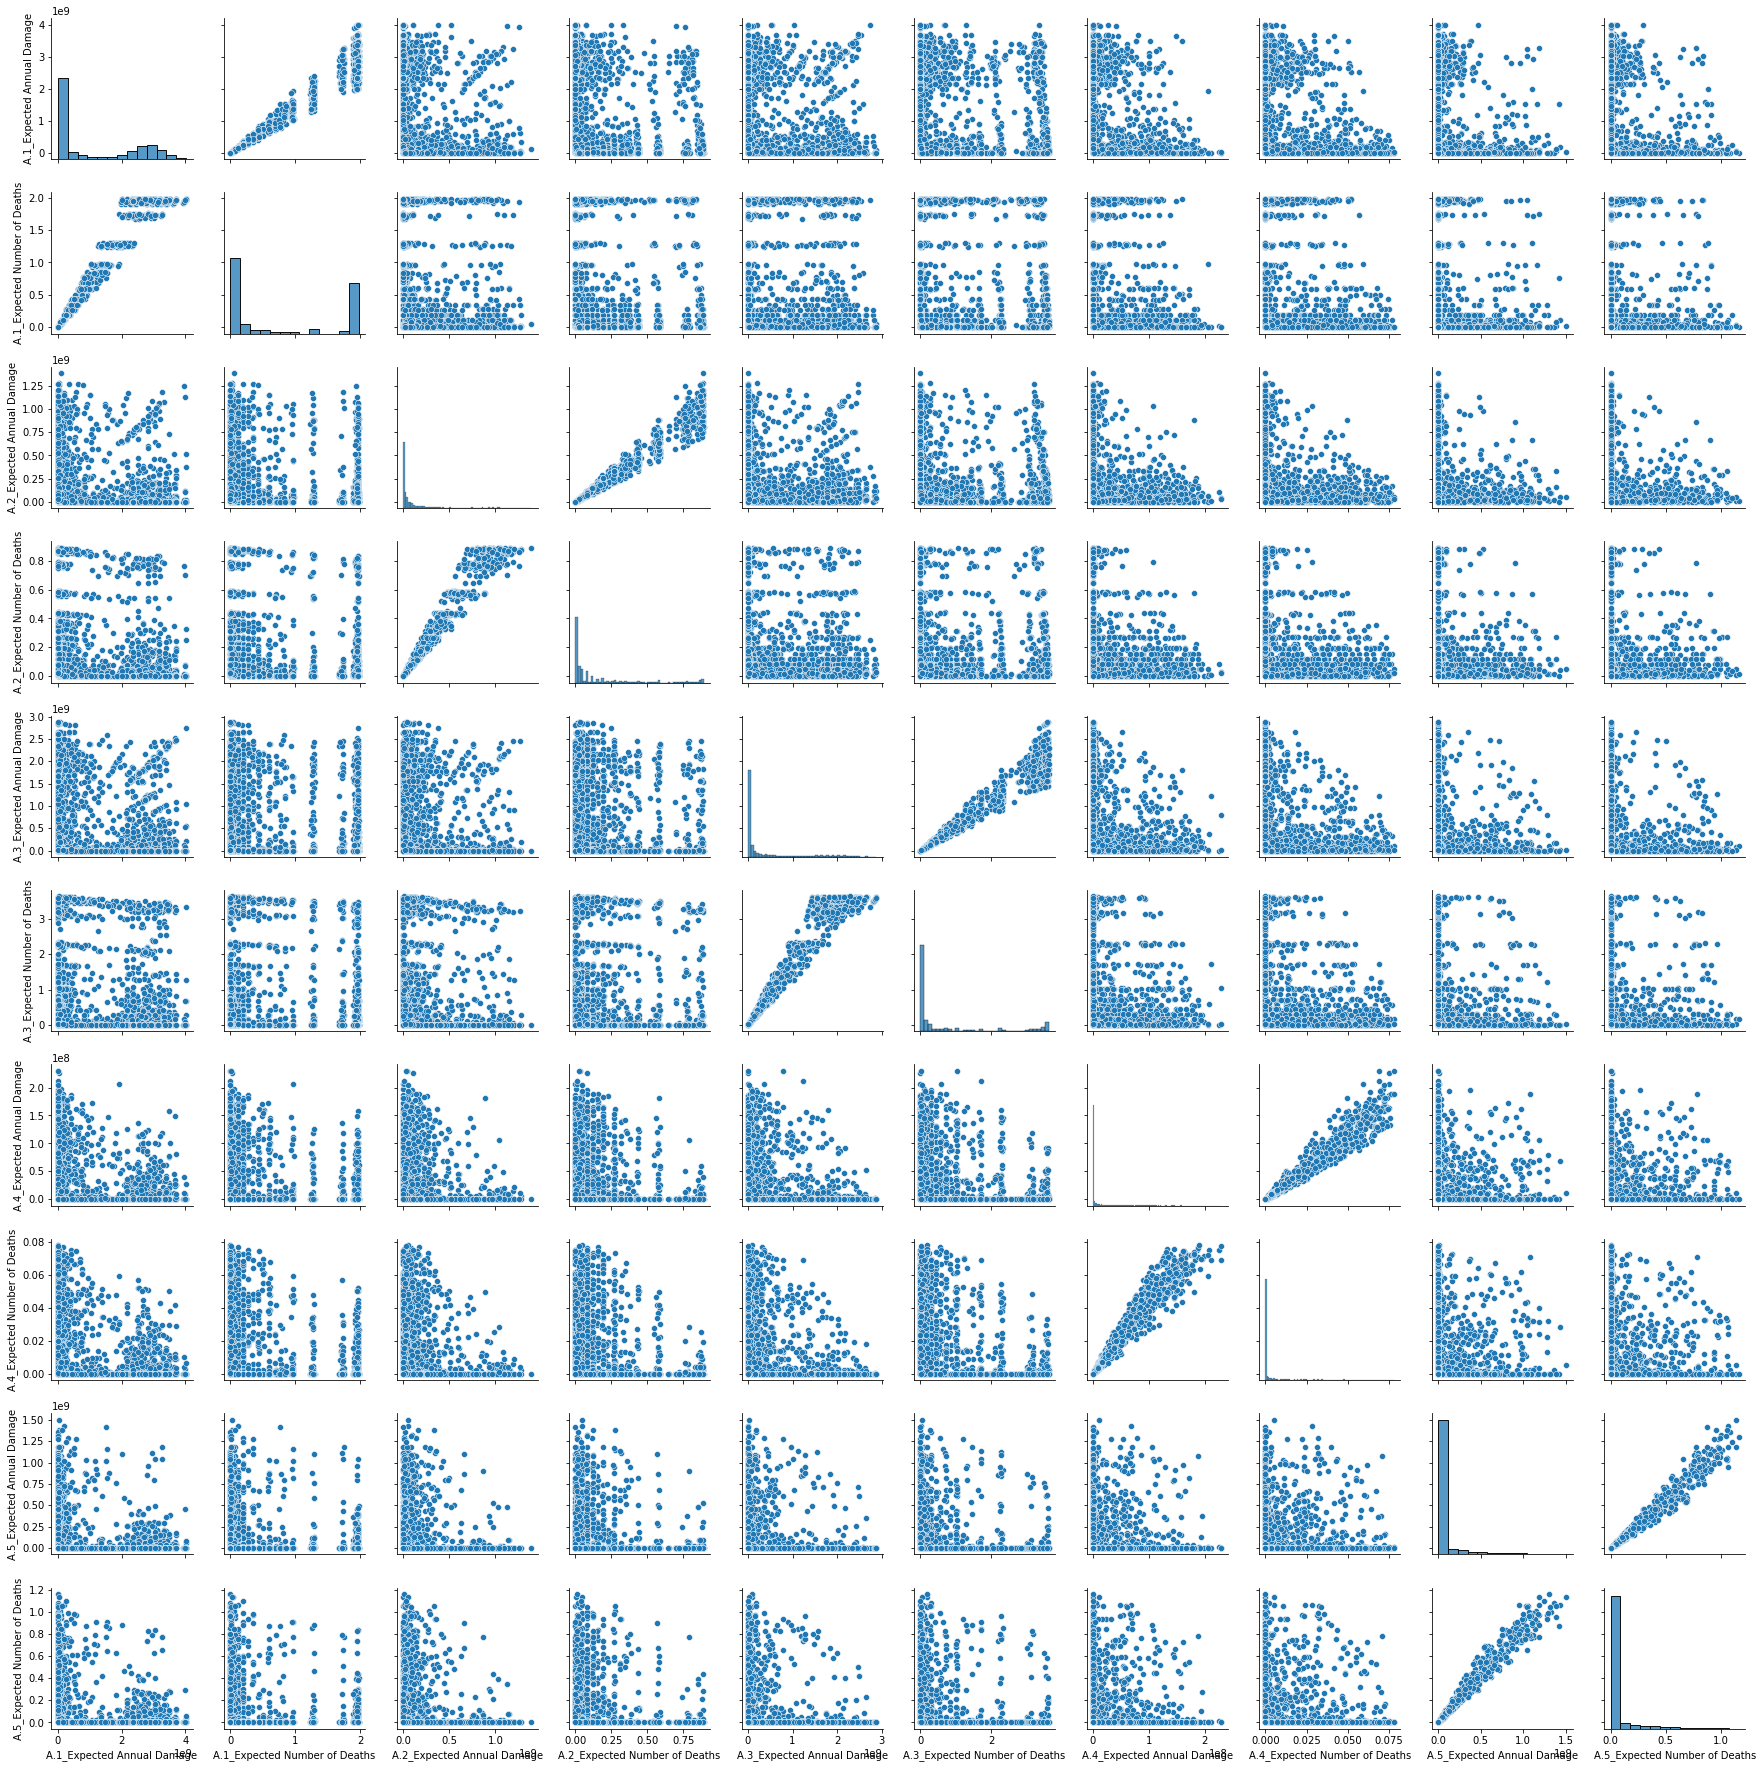

In [60]:
sns.pairplot(cleaned_outcomes_np_loc)
plt.show()

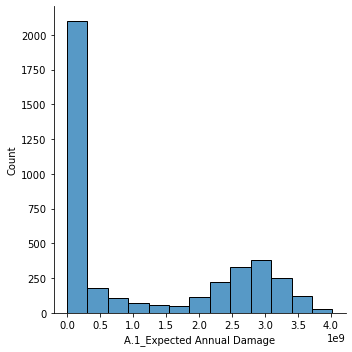

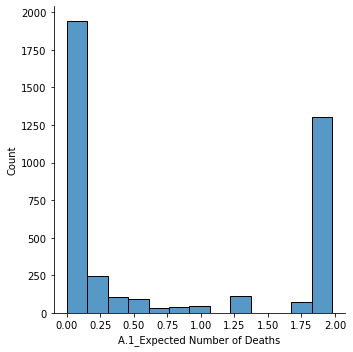

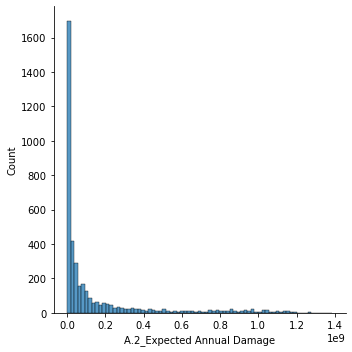

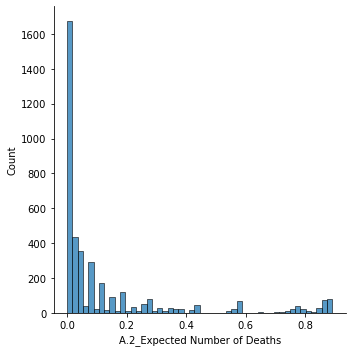

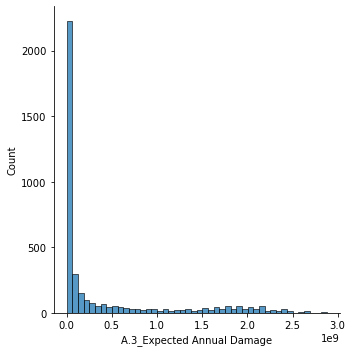

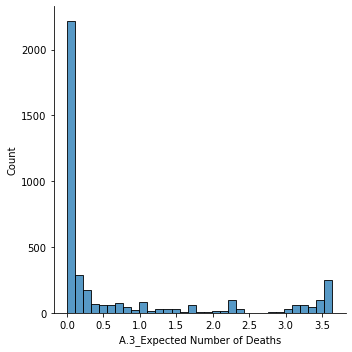

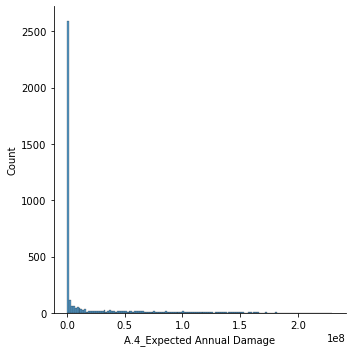

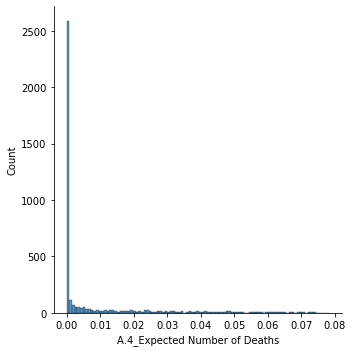

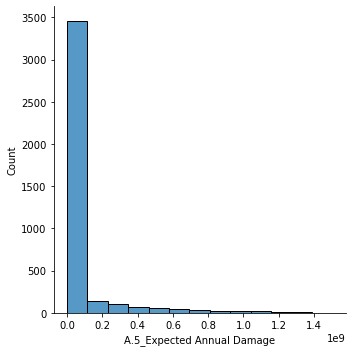

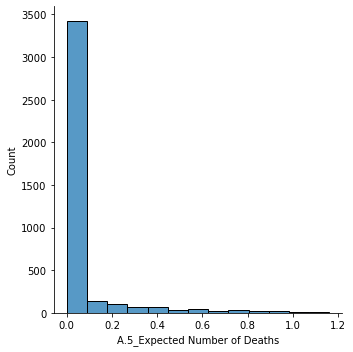

In [61]:
for col in cleaned_outcomes_np_loc:
    sns.displot(cleaned_outcomes_np_loc,x = col)
    plt.show()
    

from the plots above, we can see that the highest expected annual damage is expected to occur in dike ring 1 and the highest number of deaths in dike ring 3 in the no policy case. The expected numbers of deaths in dike ring 1 is however also very high. It seams that A2 is relatively safe in regard to flood safety. The same goes for A4 and A5.


In [62]:
from ema_workbench.analysis import prim

data = df_outcomes_np_loc["A.3_Expected Number of Deaths"]

y_A3_expected_deaths = data >= np.percentile(data, 90)

prim_alg = prim.Prim(experiments_np_loc,y_A3_expected_deaths, threshold=0.8, peel_alpha=0.05)
box2 = prim_alg.find_box()

In [63]:
box2.inspect_tradeoff()

alt.VConcatChart(...)

coverage      0.9825
density     0.700535
id                38
mass         0.14025
mean        0.700535
res_dim            3
Name: 38, dtype: object

             box 38                                          
                min       max                       qp values
A.3_pfail  0.000099  0.155207  [-1.0, 1.513151078995791e-240]
A.2_pfail  0.050037  0.999966    [0.050702540804843516, -1.0]
A.1_pfail  0.047169  0.999920     [0.10694415179889023, -1.0]



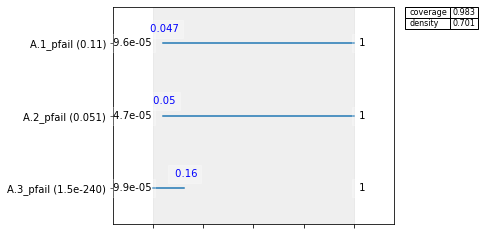

In [72]:
box2.inspect(38)
box2.inspect(38, style='graph')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

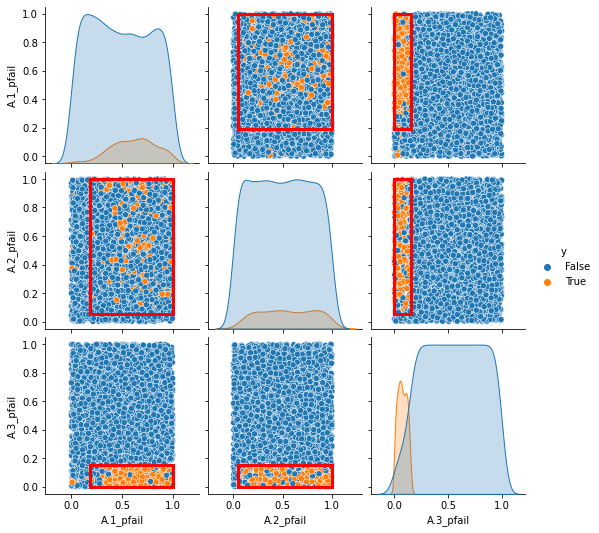

In [65]:
box2.select(41)
fig = box2.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

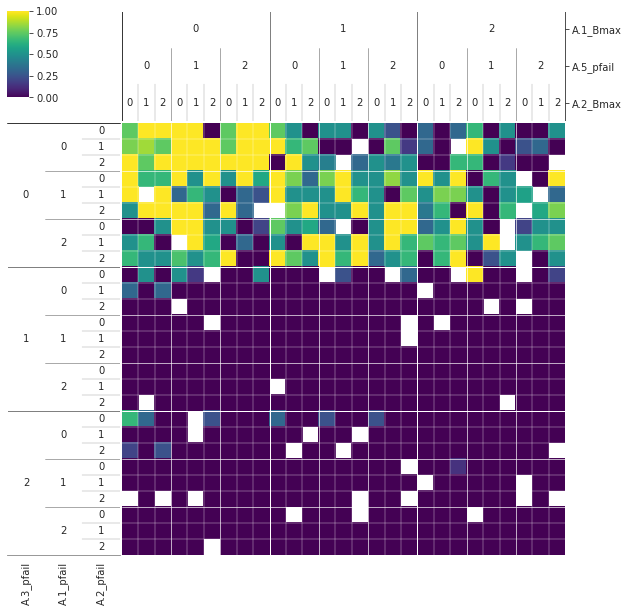

In [66]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(experiments, y_np_overall)
plt.show()

In [67]:
from ema_workbench.analysis import prim

data = df_outcomes_np_loc["A.1_Expected Annual Damage"]

y_A1_expected_damage = data >= np.percentile(data, 90)

prim_alg = prim.Prim(experiments_np_loc,y_A1_expected_damage, threshold=0.8, peel_alpha=0.05)
box3 = prim_alg.find_box()

In [69]:
box3.inspect_tradeoff()

alt.VConcatChart(...)

coverage      0.5575
density     0.851145
id                26
mass          0.0655
mean        0.851145
res_dim            4
Name: 26, dtype: object

                          box 26                   \
                             min              max   
A.1_pfail            9.59204e-05         0.336478   
discount rate 2       {1.5, 2.5}       {1.5, 2.5}   
discount rate 1       {1.5, 2.5}       {1.5, 2.5}   
discount rate 0  {1.5, 2.5, 3.5}  {1.5, 2.5, 3.5}   

                                                 
                                      qp values  
A.1_pfail         [-1.0, 6.238589751115418e-78]  
discount rate 2   [2.629227788540393e-22, -1.0]  
discount rate 1  [1.9314393479964858e-19, -1.0]  
discount rate 0  [1.2998452355606585e-07, -1.0]  



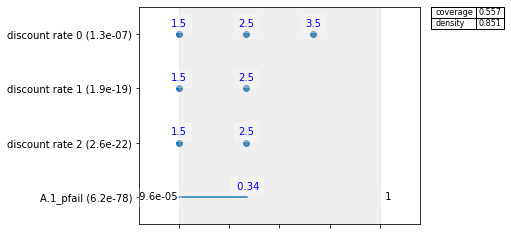

In [70]:
box3.inspect(26)
box3.inspect(26, style='graph')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

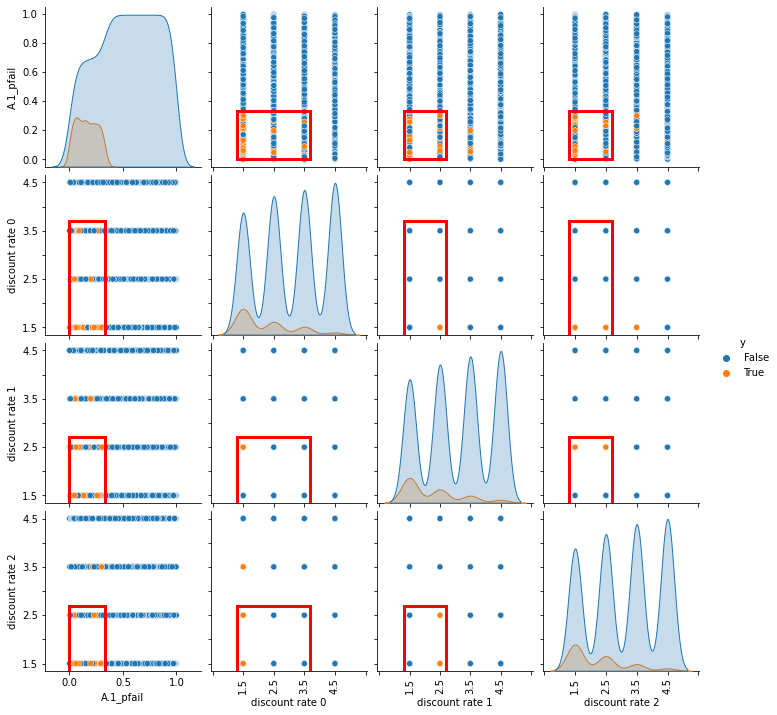

In [71]:
box3.select(26)
fig = box3.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

most damage at high dike failure (low pfail) and low discount rates

In [ ]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(experiments, y_A1_expected_damage)
plt.show()

Open exploration with 4000 random policies on three scenarios:
    
scenario 1: ref scenario
{'Bmax': 175, 'Brate': 1.5, 'pfail': 0.5, 'ID flood wave shape': 4, 'planning steps': 2, 'discount rate 0': 3.5, 'discount rate 1': 3.5, 'discount rate 2': 3.5}


scenario 2: high Bmax:
{'Bmax': 350, 'Brate': 1.5, 'pfail': 0.5, 'ID flood wave shape': 4, 'planning steps': 2, 'discount rate 0': 3.5, 'discount rate 1': 3.5, 'discount rate 2': 3.5}


scenario 3: low pfail:
{'Bmax': 175, 'Brate': 1.5, 'pfail': 0.1, 'ID flood wave shape': 4, 'planning steps': 2, 'discount rate 0': 3.5, 'discount rate 1': 3.5, 'discount rate 2': 3.5}

In [1]:
# Reading the results file
from ema_workbench import load_results
file_name = 'refscenario_randompolicy_locations.tar.gz'
results_randpol_loc_refscenario = load_results(file_name)
# Extracting experiment and outcomes from results
experiments_randpol_loc_refscenario, outcomes_randpol_loc_refscenario = results_randpol_loc_refscenario

In [2]:
experiments_randpol_loc_refscenario

discount rate 0 discount rate 1 discount rate 2  A.0_ID flood wave shape  \
0                3.5             3.5             3.5                      4.0   
1                3.5             3.5             3.5                      4.0   
2                3.5             3.5             3.5                      4.0   
3                3.5             3.5             3.5                      4.0   
4                3.5             3.5             3.5                      4.0   
...              ...             ...             ...                      ...   
3995             3.5             3.5             3.5                      4.0   
3996             3.5             3.5             3.5                      4.0   
3997             3.5             3.5             3.5                      4.0   
3998             3.5             3.5             3.5                      4.0   
3999             3.5             3.5             3.5                      4.0   

      A.1_Bmax  A.1_pfail A.1_Brate  A.2_Bmax  A.2_pfail A.2_Brate  ...  \
0        175.0        0.5       1.5     175.0        0.5       1.5  ...   
1        175.0        0.5       1.5     175.0        0.5       1.5  ...   
2        175.0        0.5       1.5     175.0        0.5       1.5  ...   
3        175.0        0.5       1.5     175.0        0.5       1.5  ...   
4        175.0        0.5       1.5     175.0        0.5       1.5  ...   
...        ...        ...       ...       ...        ...       ...  ...   
3995     175.0        0.5       1.5     175.0        0.5       1.5  ...   
3996     175.0        0.5       1.5     175.0        0.5       1.5  ...   
3997     175.0        0.5       1.5     175.0        0.5       1.5  ...   
3998     175.0        0.5       1.5     175.0        0.5       1.5  ...   
3999     175.0        0.5       1.5     175.0        0.5       1.5  ...   

      A.4_DikeIncrease 0  A.4_DikeIncrease 1 A.4_DikeIncrease 2  \
0                    0.0                 8.0                2.0   
1                    0.0                 3.0                5.0   
2                    0.0                 3.0                3.0   
3                    2.0                 3.0                3.0   
4                    6.0                 4.0                7.0   
...                  ...                 ...                ...   
3995                 8.0                 7.0                0.0   
3996                 4.0                 0.0                1.0   
3997                 8.0                 9.0                3.0   
3998                 8.0                 6.0                1.0   
3999                 3.0                 0.0                4.0   

      A.5_DikeIncrease 0  A.5_DikeIncrease 1 A.5_DikeIncrease 2  \
0                    4.0                 2.0                8.0   
1                    3.0                 4.0                5.0   
2                    5.0                 6.0                5.0   
3                    7.0                 1.0                7.0   
4                    1.0                10.0                0.0   
...                  ...                 ...                ...   
3995                 3.0                 8.0                9.0   
3996                 7.0                 5.0                2.0   
3997                 5.0                 0.0                9.0   
3998                 0.0                 9.0               10.0   
3999                 6.0                 7.0                3.0   

      EWS_DaysToThreat   scenario policy     model  
0                  1.0  reference   3034  dikesnet  
1                  1.0  reference   3035  dikesnet  
2                  2.0  reference   3036  dikesnet  
3                  4.0  reference   3037  dikesnet  
4                  1.0  reference   3038  dikesnet  
...                ...        ...    ...       ...  
3995               0.0  reference   7029  dikesnet  
3996               4.0  reference   7030  dikesnet  
3997               2.0  reference   7031  di

In [23]:
df_outcomes_randpol_loc_refscenario =pd.DataFrame.from_dict(outcomes_randpol_loc_refscenario)

In [6]:
df_outcomes_randpol_loc_refscenario

A.1 Total Costs  A.1_Expected Annual Damage  \
0        2.089691e+08                         0.0   
1        1.576980e+08                         0.0   
2        1.658501e+08                         0.0   
3        1.340882e+08                         0.0   
4        1.769111e+08                         0.0   
...               ...                         ...   
3995     1.699512e+08                         0.0   
3996     2.550238e+08                         0.0   
3997     1.647414e+08                         0.0   
3998     1.418471e+08                         0.0   
3999     2.165493e+08                         0.0   

      A.1_Expected Number of Deaths  RfR Total Costs  \
0                               0.0     1.307200e+09   
1                               0.0     9.793000e+08   
2                               0.0     1.390100e+09   
3                               0.0     9.299000e+08   
4                               0.0     8.137000e+08   
...                             ...              ...   
3995                            0.0     9.282000e+08   
3996                            0.0     1.285900e+09   
3997                            0.0     2.672000e+08   
3998                            0.0     1.184300e+09   
3999                            0.0     4.791000e+08   

      Expected Evacuation Costs  A.2 Total Costs  A.2_Expected Annual Damage  \
0                     12.621076     2.565663e+08                0.000000e+00   
1                     49.789167     2.470231e+08                0.000000e+00   
2                     20.836655     1.752324e+08                0.000000e+00   
3                      0.000000     2.563460e+08                0.000000e+00   
4                     88.628014     2.426500e+08                0.000000e+00   
...                         ...              ...                         ...   
3995                   0.000000     2.437794e+08                0.000000e+00   
3996                 355.500490     1.484454e+08                4.570942e+06   
3997                   0.000000     1.296885e+08                0.000000e+00   
3998                1426.530271     3.109535e+08                0.000000e+00   
3999                   0.000000     3.438614e+08                0.000000e+00   

      A.2_Expected Number of Deaths  A.3 Total Costs  \
0                          0.000000     7.290423e+07   
1                          0.000000     1.394765e+08   
2                          0.000000     1.075742e+08   
3                          0.000000     1.335551e+08   
4                          0.000000     5.281117e+07   
...                             ...              ...   
3995                       0.000000     6.226744e+07   
3996                       0.000625     8.559858e+07   
3997                       0.000000     1.274930e+08   
3998                       0.000000     8.391961e+07   
3999                       0.000000     9.017853e+07   

      A.3_Expected Annual Damage  A.3_Expected Number of Deaths  \
0                   0.000000e+00                       0.000000   
1                   0.000000e+00                       0.000000   
2                   0.000000e+00                       0.000000   
3                   0.000000e+00                       0.000000   
4                   0.000000e+00                       0.000000   
...                          ...                            ...   
3995                0.000000e+00                       0.000000   
3996                0.000000e+00                       0.000000   
3997                0.000000e+00                       0.000000   
3998                2.248037e+06                       0.000594   
3999                0.000000e+00                       0.000000   

      A.4 Total Costs  A.4_Expected Annual Damage  \
0        2.600334e+07                3.011823e+05   
1        2.186816e+07                1.172080e+06   
2        1.810068e+07                2.973376e+05   
3        2.637292e+07                0.000000

In [8]:
cleaned_experiments_ref_scenario = experiments_randpol_loc_refscenario.drop(experiments_randpol_loc_refscenario.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,-1,-2,-3]], axis = 1)

In [9]:
cleaned_experiments_ref_scenario

0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  2_RfR 0  2_RfR 1  \
0         1.0      1.0      0.0      0.0      1.0      0.0      0.0      0.0   
1         1.0      1.0      1.0      0.0      0.0      0.0      1.0      1.0   
2         0.0      1.0      1.0      0.0      1.0      1.0      0.0      1.0   
3         1.0      1.0      0.0      0.0      1.0      0.0      1.0      0.0   
4         1.0      1.0      1.0      0.0      0.0      0.0      1.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3995      1.0      0.0      0.0      1.0      0.0      1.0      1.0      0.0   
3996      1.0      0.0      1.0      1.0      0.0      1.0      1.0      0.0   
3997      0.0      1.0      0.0      0.0      0.0      0.0      1.0      1.0   
3998      0.0      1.0      0.0      1.0      0.0      1.0      1.0      0.0   
3999      1.0      0.0      1.0      0.0      1.0      0.0      1.0      1.0   

      2_RfR 2  3_RfR 0  ...  A.3_DikeIncrease 0  A.3_DikeIncrease 1  \
0         1.0      1.0  ...                 5.0                 0.0   
1         1.0      0.0  ...                10.0                 9.0   
2         0.0      1.0  ...                 6.0                 7.0   
3         0.0      0.0  ...                10.0                 8.0   
4         1.0      1.0  ...                 5.0                 1.0   
...       ...      ...  ...                 ...                 ...   
3995      0.0      1.0  ...                 7.0                 0.0   
3996      1.0      1.0  ...                 7.0                 9.0   
3997      0.0      0.0  ...                 8.0                 8.0   
3998      0.0      0.0  ...                 1.0                 4.0   
3999      1.0      0.0  ...                 6.0                 2.0   

      A.3_DikeIncrease 2  A.4_DikeIncrease 0  A.4_DikeIncrease 1  \
0                    8.0                 0.0                 8.0   
1                    1.0                 0.0                 3.0   
2                    2.0                 0.0                 3.0   
3                    1.0                 2.0                 3.0   
4                    0.0                 6.0                 4.0   
...                  ...                 ...                 ...   
3995                 2.0                 8.0                 7.0   
3996                 0.0                 4.0                 0.0   
3997                 3.0                 8.0                 9.0   
3998                 5.0                 8.0                 6.0   
3999                 3.0                 3.0                 0.0   

      A.4_DikeIncrease 2  A.5_DikeIncrease 0  A.5_DikeIncrease 1  \
0                    2.0                 4.0                 2.0   
1                    5.0                 3.0                 4.0   
2                    3.0                 5.0                 6.0   
3                    3.0                 7.0                 1.0   
4                    7.0                 1.0                10.0   
...                  ...                 ...                 ...   
3995                 0.0                 3.0                 8.0   
3996                 1.0                 7.0                 5.0   
3997                 3.0                 5.0                 0.0   
3998                 1.0                 0.0                 9.0   
3999                 4.0                 6.0                 7.0   

      A.5_DikeIncrease 2  EWS_DaysToThreat  
0                    8.0               1.0  
1                    5.0               1.0  
2                    5.0               2.0  
3                    7.0               4.0  
4                    0.0               1.0  
...                  ...               ...  
3995                 9.0               0.0  
3996                 2.0               4.0  
3997                 9.0               2.0  
3998                10.0               4.0  
3999                 3.0               3.0  

[4000 rows x 31 c

In [10]:
for col in cleaned_experiments_ref_scenario.columns:
    print(col)

0_RfR 0
0_RfR 1
0_RfR 2
1_RfR 0
1_RfR 1
1_RfR 2
2_RfR 0
2_RfR 1
2_RfR 2
3_RfR 0
3_RfR 1
3_RfR 2
4_RfR 0
4_RfR 1
4_RfR 2
A.1_DikeIncrease 0
A.1_DikeIncrease 1
A.1_DikeIncrease 2
A.2_DikeIncrease 0
A.2_DikeIncrease 1
A.2_DikeIncrease 2
A.3_DikeIncrease 0
A.3_DikeIncrease 1
A.3_DikeIncrease 2
A.4_DikeIncrease 0
A.4_DikeIncrease 1
A.4_DikeIncrease 2
A.5_DikeIncrease 0
A.5_DikeIncrease 1
A.5_DikeIncrease 2
EWS_DaysToThreat


In [13]:
from ema_workbench.analysis import prim

data = df_outcomes_randpol_loc_refscenario["A.3_Expected Number of Deaths"]

y_A3_pol_ref_deaths = data <= np.percentile(data, 20)

prim_alg = prim.Prim(cleaned_experiments_ref_scenario,y_A3_pol_ref_deaths, threshold=0.8, peel_alpha=0.01)
box4 = prim_alg.find_box()

In [47]:
box4.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.984726
density     0.939769
id                 1
mass           0.909
mean        0.939769
res_dim            1
Name: 1, dtype: object

                   box 1                                     
                     min   max                      qp values
A.3_DikeIncrease 0   0.5  10.0  [8.269409591084629e-46, -1.0]



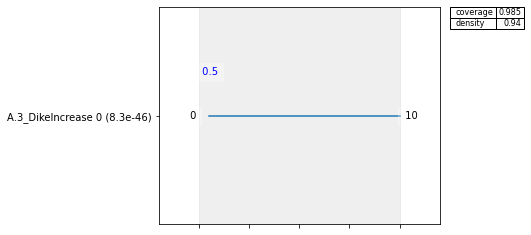

In [48]:
box4.inspect(1)
box4.inspect(1, style='graph')
plt.show()

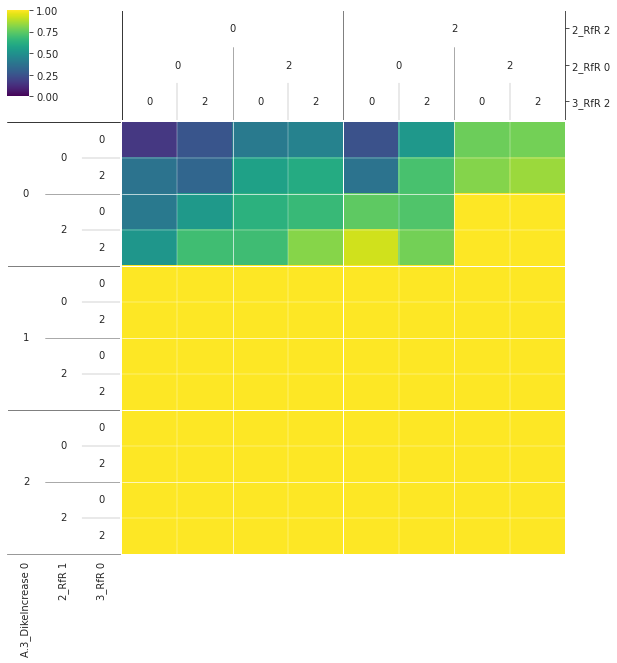

In [16]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(cleaned_experiments_ref_scenario, y_A3_pol_ref_deaths)
plt.show()

A dike increase has the highest impact for the safety of the citizens in Zutphen, but room for the river in area 1 and 2 also has a positive impact

Now we analyse 4000 random scenarios with a high value for Bmax

In [34]:
# Reading the results file
from ema_workbench import load_results
file_name = 'high_Bmax_randompolicy_locations.tar.gz'
results_randpol_loc_Bmaxscenario = load_results(file_name)
# Extracting experiment and outcomes from results
experiments_randpol_loc_Bmaxscenario, outcomes_randpol_loc_Bmaxscenario = results_randpol_loc_Bmaxscenario

In [35]:
df_outcomes_randpol_loc_Bmaxscenario =pd.DataFrame.from_dict(outcomes_randpol_loc_Bmaxscenario)

In [44]:
cleaned_experiments_Bmax_scenario = experiments_randpol_loc_Bmaxscenario.drop(experiments_randpol_loc_Bmaxscenario.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,-1,-2,-3]], axis = 1)

In [37]:
from ema_workbench.analysis import prim

data = df_outcomes_randpol_loc_Bmaxscenario["A.3_Expected Number of Deaths"]

y_A3_pol_Bmax_deaths = data < 0.00001

prim_alg = prim.Prim(cleaned_experiments_Bmax_scenario, y_A3_pol_Bmax_deaths, threshold=0.8, peel_alpha=0.01)
box5 = prim_alg.find_box()

In [46]:
box5.inspect_tradeoff()

alt.VConcatChart(...)

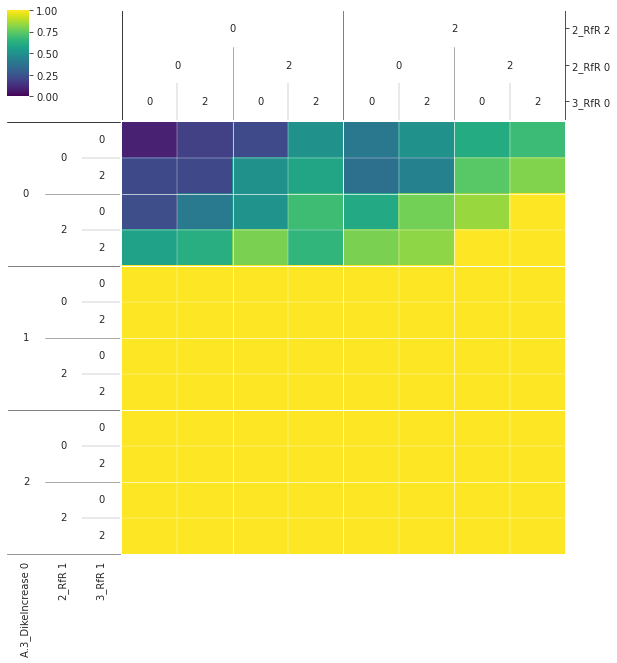

In [39]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(cleaned_experiments_Bmax_scenario, y_A3_pol_Bmax_deaths)
plt.show()

In [40]:
# Reading the results file
from ema_workbench import load_results
file_name = 'low_pfail_randompolicy_locations.tar.gz'
results_randpol_loc_pfailscenario = load_results(file_name)
# Extracting experiment and outcomes from results
experiments_randpol_loc_pfailscenario, outcomes_randpol_loc_pfailscenario = results_randpol_loc_pfailscenario

In [41]:
df_outcomes_randpol_loc_pfailscenario =pd.DataFrame.from_dict(outcomes_randpol_loc_pfailscenario)

In [43]:
cleaned_experiments_pfailscenario = experiments_randpol_loc_pfailscenario.drop(experiments_randpol_loc_pfailscenario.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,-1,-2,-3]], axis = 1)

In [45]:
from ema_workbench.analysis import prim

data = df_outcomes_randpol_loc_pfailscenario["A.3_Expected Number of Deaths"]

y_A3_pol_pfail_deaths = data < 0.00001

prim_alg = prim.Prim(cleaned_experiments_pfailscenario, y_A3_pol_pfail_deaths, threshold=0.8, peel_alpha=0.01)
box6 = prim_alg.find_box()

In [49]:
box6.inspect_tradeoff()

alt.VConcatChart(...)

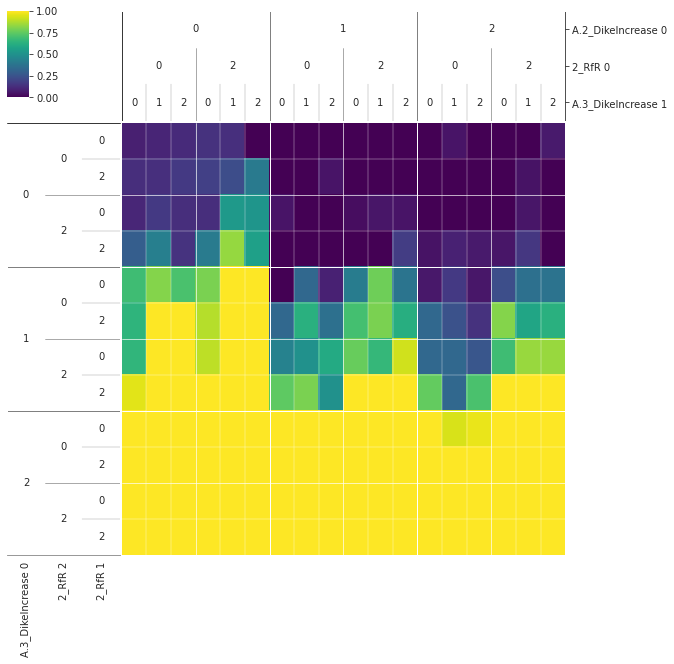

In [51]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(cleaned_experiments_pfailscenario, y_A3_pol_pfail_deaths)
plt.show()

Dike increase in the area is again the safest option, but it becomes clear that the dike needs to be higher compared to the reference scenario and the Bmax scenario. Room for the river 2 is also having an important impact in the area.